!pip install wordcloud

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mltb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df=pd.read_json("StreamingHistory0.json")
df.head()

,endTime,artistName,trackName,msPlayed
0,2020-07-21 03:55,Future,Where Ya At (feat. Drake),208026
1,2020-07-21 03:59,Nicki Minaj,Truffle Butter,220466
2,2020-07-21 04:19,Drake,One Dance,173973
3,2020-07-21 04:22,Major Lazer,Lean On,176561
4,2020-07-21 04:24,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,157560


In [3]:
df.tail()

,endTime,artistName,trackName,msPlayed
2576,2021-07-18 12:07,Nikhil Swaroop,Sitaron Ka Saaya,278000
2577,2021-07-18 12:11,Nikhil Swaroop,Kaun Tu,222000
2578,2021-07-18 12:14,Ali Sethi,Khabar-E-Tahayyur-E-Ishq,154559
2579,2021-07-18 12:14,PRETTYMUCH,Eyes Off You,9021
2580,2021-07-18 12:15,Giveon,Heartbreak Anniversary,83045


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     2581 non-null   object
 1   artistName  2581 non-null   object
 2   trackName   2581 non-null   object
 3   msPlayed    2581 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 80.8+ KB


In [5]:
df.shape

(2581, 4)

In [6]:
df.ndim

2

In [7]:
df.head(20)

,endTime,artistName,trackName,msPlayed
0,2020-07-21 03:55,Future,Where Ya At (feat. Drake),208026
1,2020-07-21 03:59,Nicki Minaj,Truffle Butter,220466
2,2020-07-21 04:19,Drake,One Dance,173973
3,2020-07-21 04:22,Major Lazer,Lean On,176561
4,2020-07-21 04:24,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,157560
5,2020-07-21 04:27,Gotye,Somebody That I Used To Know,164310
6,2020-07-21 04:30,DJ Snake,Loco Contigo (feat. J. Balvin & Tyga),150014
7,2020-07-21 04:31,DJ Snake,Loco Contigo (feat. J. Balvin & Tyga),53604
8,2020-07-21 04:33,Klaas,Get Down - Leo Salom Remix,126190
9,2020-07-21 04:37,Topic,Breaking Me,166793


In [8]:
df.nunique()

endTime       2266
artistName     582
trackName     1129
msPlayed      2040
dtype: int64

In [9]:
len(df["artistName"].unique())

582

In [10]:
df.columns

Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object')

In [11]:
#verification of to_datetime

nanos = pd.Series([1462282258000000000, 1462282258100000000, 1462282258200000000])
pd.to_datetime(nanos)


0   2016-05-03 13:30:58.000
1   2016-05-03 13:30:58.100
2   2016-05-03 13:30:58.200
dtype: datetime64[ns]

#difference between pd.to_datetime vs pd.DataTimeIndex

In [1]: import pandas as pd

In [3]: nanos = pd.Series([1462282258000000000, 1462282258100000000, 1462282258200000000])

In [4]: pd.to_datetime(nanos)
Out[4]: 
0   2016-05-03 13:30:58.000
1   2016-05-03 13:30:58.100
2   2016-05-03 13:30:58.200
dtype: datetime64[ns]

In [5]: pd.DatetimeIndex(nanos)
Out[5]: 
DatetimeIndex([       '2016-05-03 13:30:58', '2016-05-03 13:30:58.100000',
               '2016-05-03 13:30:58.200000'],
              dtype='datetime64[ns]', freq=None)

In [12]:
df["playTime"]=pd.to_datetime(df["endTime"])
df

,endTime,artistName,trackName,msPlayed,playTime
0,2020-07-21 03:55,Future,Where Ya At (feat. Drake),208026,2020-07-21 03:55:00
1,2020-07-21 03:59,Nicki Minaj,Truffle Butter,220466,2020-07-21 03:59:00
2,2020-07-21 04:19,Drake,One Dance,173973,2020-07-21 04:19:00
3,2020-07-21 04:22,Major Lazer,Lean On,176561,2020-07-21 04:22:00
4,2020-07-21 04:24,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,157560,2020-07-21 04:24:00
...,...,...,...,...,...
2576,2021-07-18 12:07,Nikhil Swaroop,Sitaron Ka Saaya,278000,2021-07-18 12:07:00
2577,2021-07-18 12:11,Nikhil Swaroop,Kaun Tu,222000,2021-07-18 12:11:00
2578,2021-07-18 12:14,Ali Sethi,Khabar-E-Tahayyur-E-Ishq,154559,2021-07-18 12:14:00
2579,2021-07-18 12:14,PRETTYMUCH,Eyes Off You,9021,2021-07-18 12:14:00


In [13]:
df["year"]=pd.DatetimeIndex(df["playTime"]).year
df["month"]=pd.DatetimeIndex(df["playTime"]).month
df["day"]=pd.DatetimeIndex(df["playTime"]).day
df["weekday"]=pd.DatetimeIndex(df["playTime"]).weekday
df["time"]=pd.DatetimeIndex(df["playTime"]).time
df["hour"]=pd.DatetimeIndex(df["playTime"]).hour
df["day-name"]=df["playTime"].apply(lambda x: x.day_name())
df["Count"]=1

In [14]:
df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(df["msPlayed"], unit='ms')

Here we used the `to_timedelta` module to obatin the information regarding the time frame of the song played in milli-seconds.

We also converted the information given in milli-seconds into proper format and added it into another column called `Time-Played (hh-mm-ss)`.

* For more info (`to_timedelta`) : https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html

a day = 24 hrs = 1440 min =86400 secs

In [15]:
def hour(td):
    return td.seconds/3600 
def minutes(td):
    return(td.seconds//60)%60

df["ListeningTime(Hours)"]=df["Time-Played (hh-mm-ss)"].apply(hour).round(3)
df["ListeningTime(Minutes)"]=df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)

In [16]:
df.head()

,endTime,artistName,trackName,msPlayed,playTime,year,month,day,weekday,time,hour,day-name,Count,Time-Played (hh-mm-ss),ListeningTime(Hours),ListeningTime(Minutes)
0,2020-07-21 03:55,Future,Where Ya At (feat. Drake),208026,2020-07-21 03:55:00,2020,7,21,1,03:55:00,3,Tuesday,1,0 days 00:03:28.026000,0.058,3
1,2020-07-21 03:59,Nicki Minaj,Truffle Butter,220466,2020-07-21 03:59:00,2020,7,21,1,03:59:00,3,Tuesday,1,0 days 00:03:40.466000,0.061,3
2,2020-07-21 04:19,Drake,One Dance,173973,2020-07-21 04:19:00,2020,7,21,1,04:19:00,4,Tuesday,1,0 days 00:02:53.973000,0.048,2
3,2020-07-21 04:22,Major Lazer,Lean On,176561,2020-07-21 04:22:00,2020,7,21,1,04:22:00,4,Tuesday,1,0 days 00:02:56.561000,0.049,2
4,2020-07-21 04:24,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,157560,2020-07-21 04:24:00,2020,7,21,1,04:24:00,4,Tuesday,1,0 days 00:02:37.560000,0.044,2


In [17]:
df.describe()

,msPlayed,year,month,day,weekday,hour,Count,Time-Played (hh-mm-ss),ListeningTime(Hours),ListeningTime(Minutes)
count,2.581000e+03,2581.000000,2581.000000,2581.000000,2581.000000,2581.000000,2581.0,2581,2581.000000,2581.000000
mean,1.621869e+05,2020.772181,6.296784,15.660209,2.863619,10.911275,1.0,0 days 00:02:42.186869817,0.044918,2.217745
std,2.218807e+05,0.419506,2.503228,8.531588,2.111797,5.000724,0.0,0 days 00:03:41.880704249,0.061633,3.203416
min,0.000000e+00,2020.000000,1.000000,1.000000,0.000000,0.000000,1.0,0 days 00:00:00,0.000000,0.000000
25%,5.909000e+04,2021.000000,6.000000,9.000000,1.000000,7.000000,1.0,0 days 00:00:59.090000,0.016000,0.000000
50%,1.643100e+05,2021.000000,7.000000,16.000000,3.000000,11.000000,1.0,0 days 00:02:44.310000,0.046000,2.000000
75%,2.111900e+05,2021.000000,7.000000,22.000000,5.000000,14.000000,1.0,0 days 00:03:31.190000,0.059000,3.000000
max,4.271365e+06,2021.000000,12.000000,31.000000,6.000000,23.000000,1.0,0 days 01:11:11.365000,1.186000,59.000000


In [18]:
df.columns

Index(['endTime', 'artistName', 'trackName', 'msPlayed', 'playTime', 'year',
       'month', 'day', 'weekday', 'time', 'hour', 'day-name', 'Count',
       'Time-Played (hh-mm-ss)', 'ListeningTime(Hours)',
       'ListeningTime(Minutes)'],
      dtype='object')

In [19]:
df.drop(columns=["endTime","Time-Played (hh-mm-ss)","msPlayed"], inplace=True)

In [20]:
df

,artistName,trackName,playTime,year,month,day,weekday,time,hour,day-name,Count,ListeningTime(Hours),ListeningTime(Minutes)
0,Future,Where Ya At (feat. Drake),2020-07-21 03:55:00,2020,7,21,1,03:55:00,3,Tuesday,1,0.058,3
1,Nicki Minaj,Truffle Butter,2020-07-21 03:59:00,2020,7,21,1,03:59:00,3,Tuesday,1,0.061,3
2,Drake,One Dance,2020-07-21 04:19:00,2020,7,21,1,04:19:00,4,Tuesday,1,0.048,2
3,Major Lazer,Lean On,2020-07-21 04:22:00,2020,7,21,1,04:22:00,4,Tuesday,1,0.049,2
4,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,2020-07-21 04:24:00,2020,7,21,1,04:24:00,4,Tuesday,1,0.044,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,Nikhil Swaroop,Sitaron Ka Saaya,2021-07-18 12:07:00,2021,7,18,6,12:07:00,12,Sunday,1,0.077,4
2577,Nikhil Swaroop,Kaun Tu,2021-07-18 12:11:00,2021,7,18,6,12:11:00,12,Sunday,1,0.062,3
2578,Ali Sethi,Khabar-E-Tahayyur-E-Ishq,2021-07-18 12:14:00,2021,7,18,6,12:14:00,12,Sunday,1,0.043,2
2579,PRETTYMUCH,Eyes Off You,2021-07-18 12:14:00,2021,7,18,6,12:14:00,12,Sunday,1,0.002,0


# Exploratory Analysis & Visualization

In [21]:
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

mltb.rcParams['font.size']=14
mltb.rcParams['figure.figsize']=(9,5)
mltb.rcParams['figure.facecolor']= '#00000000'

In [22]:
df.columns

Index(['artistName', 'trackName', 'playTime', 'year', 'month', 'day',
       'weekday', 'time', 'hour', 'day-name', 'Count', 'ListeningTime(Hours)',
       'ListeningTime(Minutes)'],
      dtype='object')

In [23]:
unique_artists=df["artistName"].nunique()
unique_artists

582

In [24]:
total_artists= df["artistName"].count
total_artists

<bound method Series.count of 0               Future
1          Nicki Minaj
2                Drake
3          Major Lazer
4          Post Malone
             ...      
2576    Nikhil Swaroop
2577    Nikhil Swaroop
2578         Ali Sethi
2579        PRETTYMUCH
2580            Giveon
Name: artistName, Length: 2581, dtype: object>

In [25]:
unique_artists = df["artistName"].nunique() 
total_artists = df["artistName"].count() 
unique_artist_percentage = unique_artists/total_artists*100 
unique_artist_percentage

22.549399457574584

In [26]:
unique_artists_list=np.array([unique_artists,total_artists-unique_artists])
unique_artists_list


array([ 582, 1999])

In [27]:
unique_artists_labels=["Unique Artists","Non-Unique Artists"]

In [28]:
import matplotlib.colors as mcolors

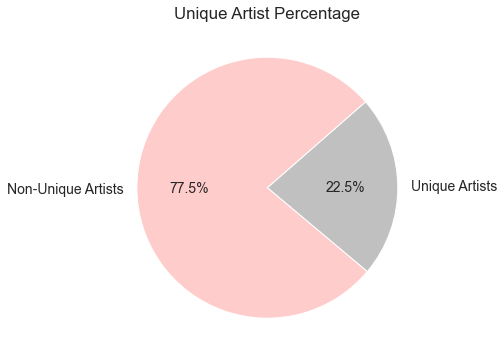

In [29]:
fig, ax=plt.subplots(figsize=(10,6))
ax.pie(unique_artists_list,labels=unique_artists_labels,autopct='%1.1f%%',startangle=320,colors = ['#C0C0C0','#FFCCCC'])
plt.title("Unique Artist Percentage");

In [30]:
top_10_artists=df.groupby(["artistName"])[['ListeningTime(Hours)','ListeningTime(Minutes)','Count']].sum().sort_values(by='ListeningTime(Minutes)',ascending=False)
top_10_artists.head(11)

,ListeningTime(Hours),ListeningTime(Minutes),Count
artistName,,,
The Ranveer Show,7.765,399,21
Kyle Olthoff,4.268,224,93
The Joe Rogan Experience,3.509,143,21
A.R. Rahman,2.605,140,29
Maroon 5,2.680,138,54
Shankar Mahadevan,1.999,109,27
Postcards From Mars,1.720,87,44
Russ,1.826,85,55
Taylor Swift,1.699,81,36


In [31]:
#artists least listened to

top_10_artists.tail(11)

,ListeningTime(Hours),ListeningTime(Minutes),Count
artistName,,,
Mehdi Hassan,0.008,0,1
Michael Brook,0.009,0,1
Michael Calfan,0.012,0,1
Michael Jackson,0.010,0,2
Mikey Dam,0.007,0,1
Mimi Webb,0.007,0,1
MitiS,0.007,0,1
Mustafa Zahid,0.004,0,1
NEFFEX,0.001,0,1


In [32]:
df.columns

Index(['artistName', 'trackName', 'playTime', 'year', 'month', 'day',
       'weekday', 'time', 'hour', 'day-name', 'Count', 'ListeningTime(Hours)',
       'ListeningTime(Minutes)'],
      dtype='object')

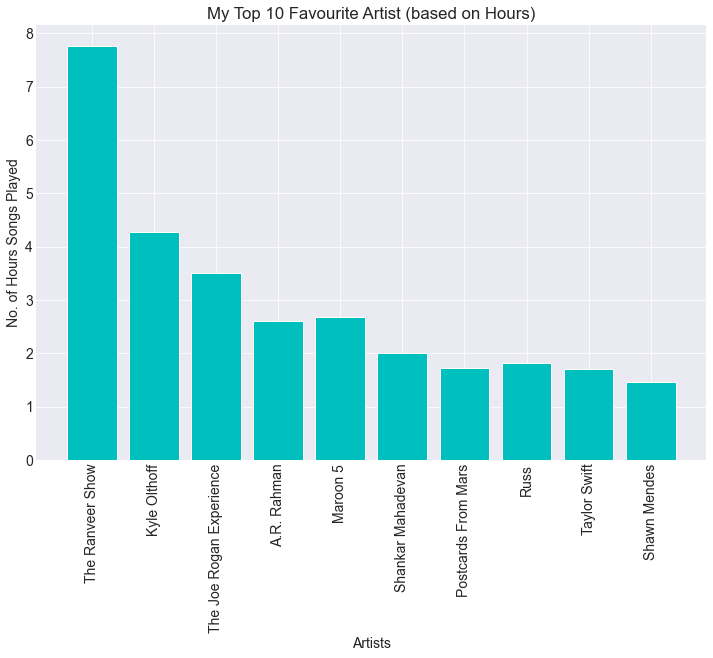

In [33]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artists.head(10).index,top_10_artists["ListeningTime(Hours)"].head(10),color='c')
ax.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
plt.xticks(rotation=90);

In [34]:
top_10_artists=df.groupby(["artistName"])[['ListeningTime(Hours)','ListeningTime(Minutes)','Count']].sum().sort_values(by='ListeningTime(Hours)',ascending=False)
top_10_artists.head(11)

,ListeningTime(Hours),ListeningTime(Minutes),Count
artistName,,,
The Ranveer Show,7.765,399,21
Kyle Olthoff,4.268,224,93
The Joe Rogan Experience,3.509,143,21
Maroon 5,2.680,138,54
A.R. Rahman,2.605,140,29
Shankar Mahadevan,1.999,109,27
Russ,1.826,85,55
Postcards From Mars,1.720,87,44
Taylor Swift,1.699,81,36


In [35]:
top_10_artists_Count=df.groupby(["artistName"])[['ListeningTime(Hours)','ListeningTime(Minutes)','Count']].sum().sort_values(by='Count',ascending=False)
top_10_artists_Count.head(11)

,ListeningTime(Hours),ListeningTime(Minutes),Count
artistName,,,
Kyle Olthoff,4.268,224,93
Russ,1.826,85,55
Maroon 5,2.680,138,54
XXXTENTACION,1.555,68,50
Postcards From Mars,1.720,87,44
Taylor Swift,1.699,81,36
Shawn Mendes,1.455,75,35
Naval,1.229,62,34
DJ Snake,1.369,70,33


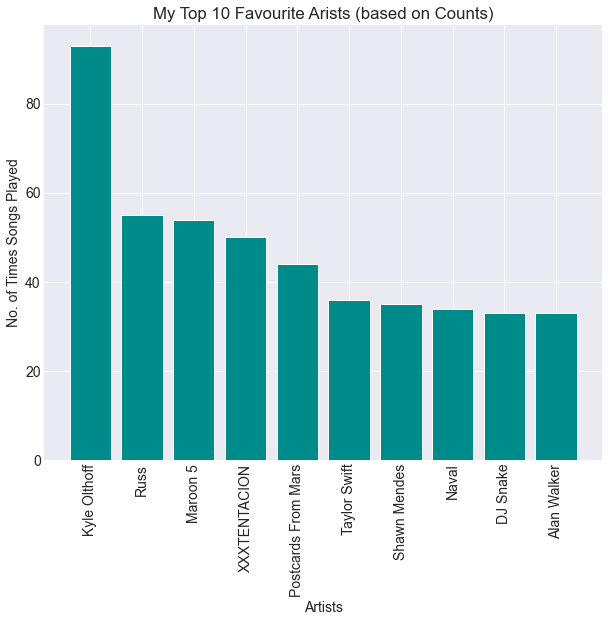

In [36]:
fig,ax=plt.subplots(figsize=(10,8))
ax.bar(top_10_artists_Count.head(10).index,top_10_artists_Count["Count"].head(10),color="darkcyan")
ax.set(title="My Top 10 Favourite Arists (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
plt.xticks(rotation=90);


# Top 10 fav artists based on count

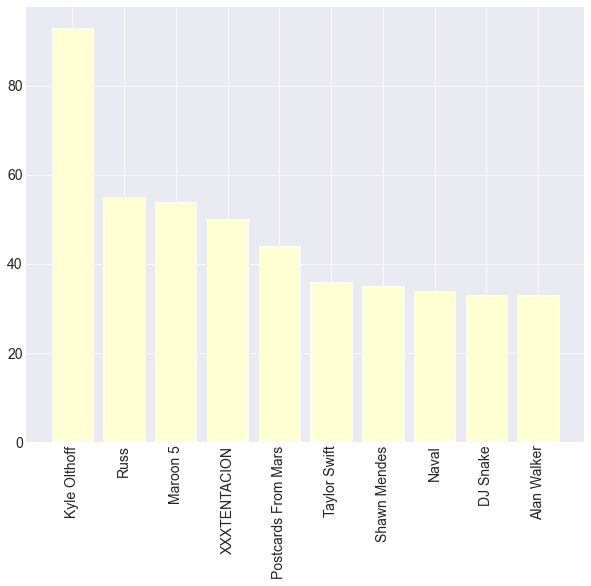

In [37]:
fig, ax=plt.subplots(figsize=(10,8))
ax.bar(top_10_artists_Count.head(10).index,top_10_artists_Count["Count"].head(10),color='xkcd:eggshell')
plt.xticks(rotation=90);

# Song tracks Exploration

In [38]:
df.columns

Index(['artistName', 'trackName', 'playTime', 'year', 'month', 'day',
       'weekday', 'time', 'hour', 'day-name', 'Count', 'ListeningTime(Hours)',
       'ListeningTime(Minutes)'],
      dtype='object')

In [39]:
#count of unique songs

unique_songs=df["trackName"].nunique()
unique_songs

1129

In [40]:
total_songs=df["trackName"].count()
total_songs

2581

In [41]:
unique_songs_percentage=unique_songs/total_songs*100
unique_songs_percentage

43.74273537388609

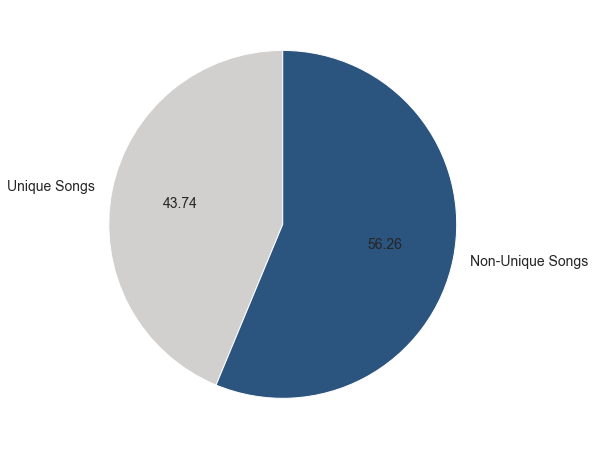

In [42]:
unique_songs_list=np.array([unique_songs,total_songs-unique_songs])
unique_songs_list_label=["Unique Songs","Non-Unique Songs"]
fig,ax=plt.subplots(figsize=(10,8))
ax.pie(unique_songs_list,labels=unique_songs_list_label,autopct='%.2f',colors=["#D1D0CE", "#2B547E"],startangle=90)
plt.title="Unique Songs Percentage";

In [43]:
#count of top 10 songs

top_10_songs_count=df.groupby(["trackName"])[["ListeningTime(Hours)",'ListeningTime(Minutes)','Count']].sum().sort_values(by="Count",ascending=False)
top_10_songs_count.head(10)

,ListeningTime(Hours),ListeningTime(Minutes),Count
trackName,,,
Paranoia,1.062,57,32
Black Silence,1.753,90,27
La vie en rose,0.814,38,24
bad vibes forever,0.869,41,21
Zara Zara,1.043,55,21
The Whale,0.720,36,20
Lonely Alone,0.902,47,20
Shiv Tandav Stotram,1.736,95,19
#1309 - Naval Ravikant,3.351,135,18


In [44]:
#top 10 songs based on time listened

top_10_songs_time=df.groupby(["trackName"])[["ListeningTime(Hours)",'ListeningTime(Minutes)','Count']].sum().sort_values(by="ListeningTime(Minutes)",ascending=False)
top_10_songs_time.head(10)

,ListeningTime(Hours),ListeningTime(Minutes),Count
trackName,,,
#1309 - Naval Ravikant,3.351,135,18
Luke Coutinho On Mental Toughness And Brain Training For SUCCESS | The Ranveer Show 101,1.991,117,6
Shiv Tandav Stotram,1.736,95,19
Kun Faya Kun,1.654,94,11
Black Silence,1.753,90,27
"Love, S*x and More - Tips, Secrets & Techniques ft. Luke Coutinho | The Ranveer Show 109",1.402,83,4
Paranoia,1.062,57,32
Khabar-E-Tahayyur-E-Ishq,1.036,56,18
Zara Zara,1.043,55,21


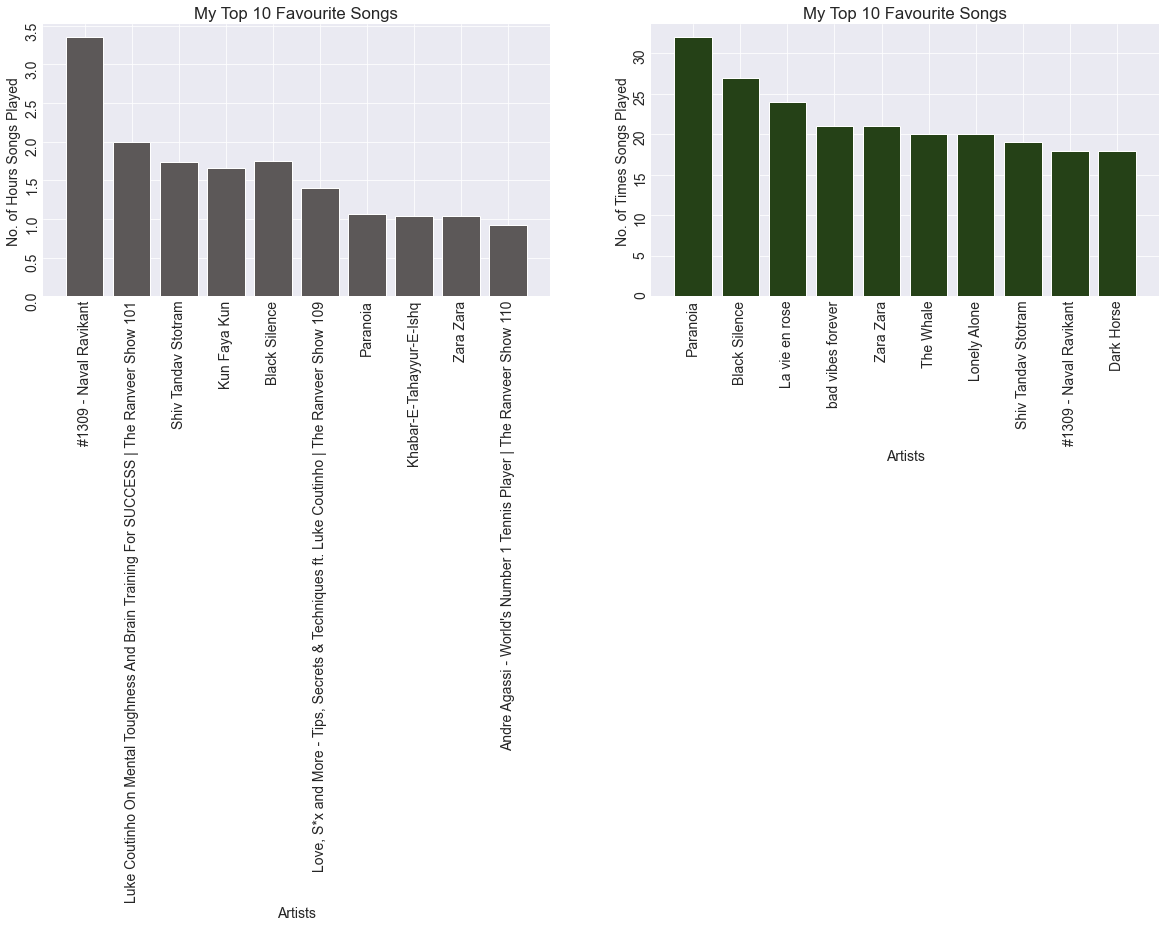

In [45]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# Setting up our first graph
ax1.bar(top_10_songs_time.head(10).index,top_10_songs_time["ListeningTime(Hours)"].head(10), color="#5C5858")
ax1.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=90);


# Setting up our second graph
ax2.bar(top_10_songs_count.head(10).index,top_10_songs_count["Count"].head(10), color="#254117")
ax2.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=90);


# Song Tracks Exploration

In [46]:
df.columns

Index(['artistName', 'trackName', 'playTime', 'year', 'month', 'day',
       'weekday', 'time', 'hour', 'day-name', 'Count', 'ListeningTime(Hours)',
       'ListeningTime(Minutes)'],
      dtype='object')

In [47]:
#percentage of my unique songs 

unique_songs=df["trackName"].nunique()
total_songs=df["trackName"].count()
percent_of_unique_songs=unique_songs/total_songs*100
print(percent_of_unique_songs)

43.74273537388609


[1129 1452]


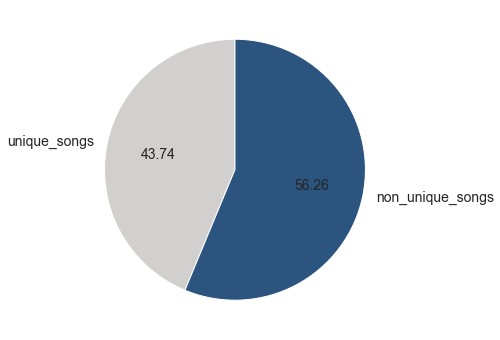

In [48]:

unique_songs_list=np.array([unique_songs,total_songs-unique_songs])
print(unique_songs_list)
fig,ax=plt.subplots(figsize=(12,6))
ax.pie(unique_songs_list,labels=["unique_songs","non_unique_songs"],autopct='%.2f',colors=["#D1D0CE", "#2B547E"],startangle=90)
plt.title="Unique Songs Percentage";



# Day wise usage Exploration

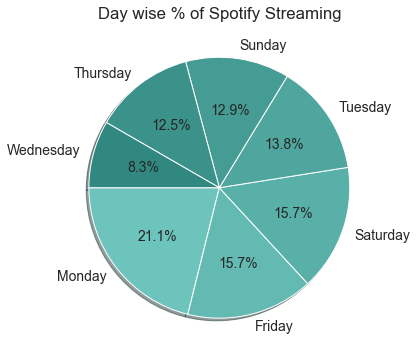

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(df["day-name"].value_counts(), labels=df["day-name"].value_counts().index, autopct='%1.1f%%', startangle=180, shadow = True,colors=["#6DC4BC","#63BAB2","#59B0A8","#4FA69E","#459C94","#3B928A","#318880","#77CEC6"]);
ax.set(title="Day wise % of Spotify Streaming");

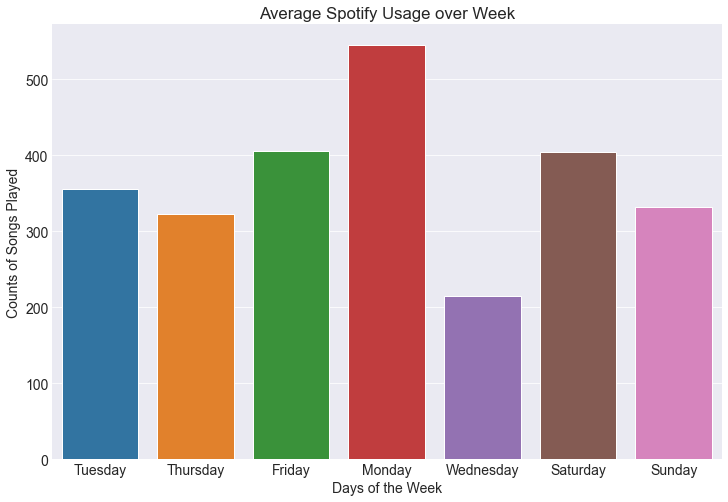

In [50]:
#countplot -> my spotify usage over weeks
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.countplot(x=df["day-name"])
plt.xticks(rotation=0);
ax.set(title="Average Spotify Usage over Week",xlabel="Days of the Week",ylabel="Counts of Songs Played");

In [51]:
# hours spent on spotify

time_spent_hours = df["ListeningTime(Hours)"].sum() # Summation of all 
time_spent_hours

115.934

In [52]:
#percentage of usage distribution on weekdays vs weekends

df_1=df.copy()
df_1["is_weekend"]=df_1["day-name"].isin(["Saturday","Sunday"])
weekday_vs_weekend=df_1.groupby(["is_weekend"])[['Count']].sum()
weekday_vs_weekend

,Count
is_weekend,
False,1845
True,736


In [53]:
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100
weekday_vs_weekend

,Count,Percentage
is_weekend,,
False,1845,71.483921
True,736,28.516079


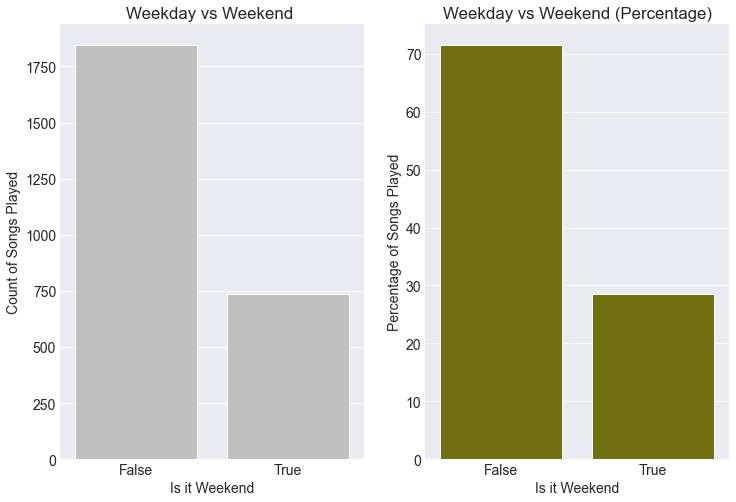

In [54]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1=sns.barplot(data=weekday_vs_weekend,x=["False","True"],y="Count",ax=ax1,color="silver")
ax1.set(title="Weekday vs Weekend ",xlabel="Is it Weekend",ylabel="Count of Songs Played")


ax2 = sns.barplot(x=["False","True"],y="Percentage",data=weekday_vs_weekend,color="Olive",ax=ax2)
ax2.set(title="Weekday vs Weekend (Percentage)",xlabel="Is it Weekend",ylabel="Percentage of Songs Played");

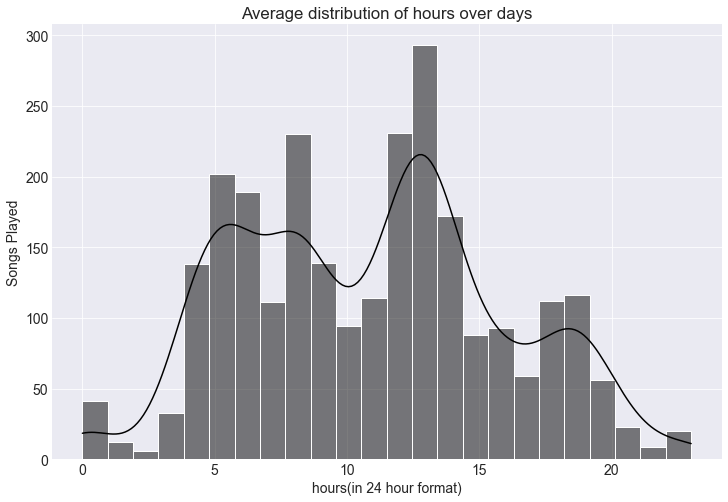

In [55]:
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.histplot(data=df["hour"],bins=24,kde=True,color="black")
ax.set(title="Average distribution of hours over days",xlabel="hours(in 24 hour format)",ylabel="Songs Played");

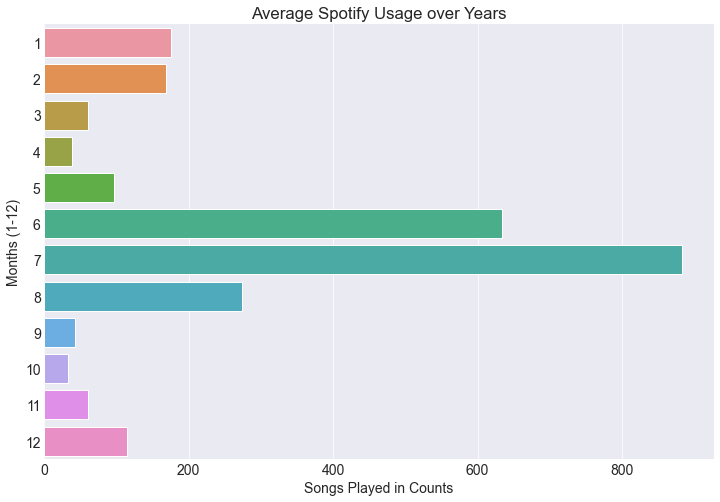

In [56]:
#average usage in a year
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.countplot(y=df["month"],ax=ax)
ax.set(title="Average Spotify Usage over Years", xlabel="Songs Played in Counts", ylabel="Months (1-12)");

used spotify the most in june ,july

In [57]:
# How many hours did I spent on Spotify Streaming since last year

time_spent_hours =df["ListeningTime(Hours)"].sum() # Summation of all 
time_spent_hours

115.934

In [58]:
#actual usage in percentage compared to to the total time possible?

date_df = df["playTime"] # Making a new dataset of time only
date_df

0      2020-07-21 03:55:00
1      2020-07-21 03:59:00
2      2020-07-21 04:19:00
3      2020-07-21 04:22:00
4      2020-07-21 04:24:00
               ...        
2576   2021-07-18 12:07:00
2577   2021-07-18 12:11:00
2578   2021-07-18 12:14:00
2579   2021-07-18 12:14:00
2580   2021-07-18 12:15:00
Name: playTime, Length: 2581, dtype: datetime64[ns]

In [59]:
date_df.shape

(2581,)

In [60]:
#subtracting the time, from the start time (when I logged-in to use my spotify for the first time) 
#to the end time (The last time I used Spotify as per the dataset.
#Then we divided that with np.timedelta64 function to convert and calculate the time into days


time_difference=(date_df.iloc[2580]-date_df.iloc[0]) / np.timedelta64(1,"D")
time_difference

362.34722222222223

In [61]:
#multipling it with 24 to convert it into hours

time_differnce_hours=time_difference*24
time_differnce_hours

8696.333333333334

In [62]:
#percentage of total time spent science i started using spotify

percent_time_spent=time_spent_hours/time_differnce_hours*100
percent_time_spent.round(3)

1.333

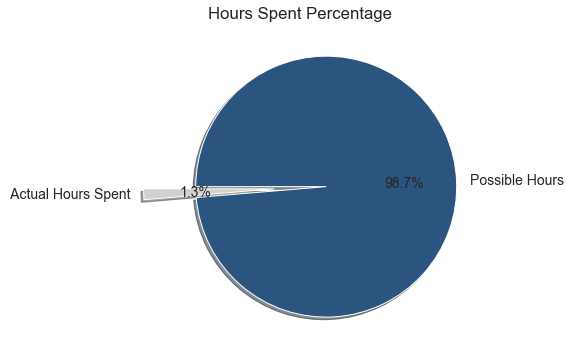

In [63]:
hours_spent_list=np.array([time_spent_hours, time_differnce_hours-time_spent_hours])
hours_spent_list_labels = [" Actual Hours Spent", "Possible Hours"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(hours_spent_list, labels= hours_spent_list_labels, autopct='%1.1f%%', colors=["#D1D0CE", "#2B547E"], explode=[0.2,0.2], startangle=180, shadow = True);
ax.set(title="Hours Spent Percentage");

In [64]:
#the average numbers of songs I played daily
total_songs=df["trackName"].count()
total_songs

2581

In [65]:
time_difference

362.34722222222223

In [66]:
average_songs_played_daily=total_songs/time_difference
average_songs_played_daily.round()

7.0

In [67]:
# know about the days when I played maximum numbers of songs in a day.

df["date"]=df["playTime"].dt.date

In [68]:
most_songs=df.groupby(["date"])[["Count"]].sum().sort_values(by="Count",ascending=False)
most_songs.head(10)

,Count
date,
2021-07-05,217
2021-07-10,162
2021-06-22,120
2021-06-21,115
2021-07-09,96
2021-06-25,81
2021-06-24,67
2021-06-30,65
2021-07-02,65


In [69]:
most_songs.tail(10)

,Count
date,
2021-03-22,1
2021-06-09,1
2021-04-10,1
2021-04-16,1
2021-01-20,1
2021-05-14,1
2020-12-03,1
2021-05-22,1
2021-06-08,1


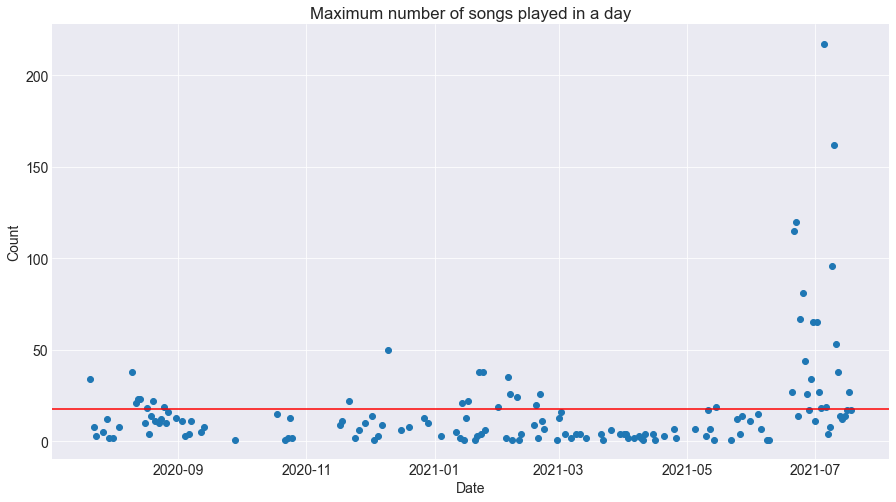

In [70]:
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(most_songs.index,most_songs["Count"]);
ax.set(title="Maximum number of songs played in a day",xlabel="Date",ylabel="Count");
ax.axhline(most_songs["Count"].mean(), linestyle="-", color="r");

In [82]:
# Favourite Artist playlist for the user, based on his daily usage

my_fav_artist_playlist=df.groupby(["artistName","trackName"])[["Count"]].count().sort_values(by="Count",ascending=False).head(100)
my_fav_artist_playlist

Count
artistName      trackName                       
Kyle Olthoff    Paranoia                      32
                Black Silence                 27
Laura Fygi      La vie en rose                24
XXXTENTACION    bad vibes forever             21
Kavita Seth     Zara Zara                     21
...                                          ...
Imagine Dragons Thunder                        5
Joel Corry      Head & Heart (feat. MNEK)      5
DNCE            Truthfully                     5
Becky G         Shower                         5
Camila Cabello  Havana (feat. Young Thug)      5

[100 rows x 1 columns]

In [107]:
most_songs=df.groupby(["trackName"])[["Count"]].sum().sort_values(by="Count",ascending=False)
most_songs.head(10)

,Count
trackName,
Paranoia,32
Black Silence,27
La vie en rose,24
bad vibes forever,21
Zara Zara,21
The Whale,20
Lonely Alone,20
Shiv Tandav Stotram,19
#1309 - Naval Ravikant,18


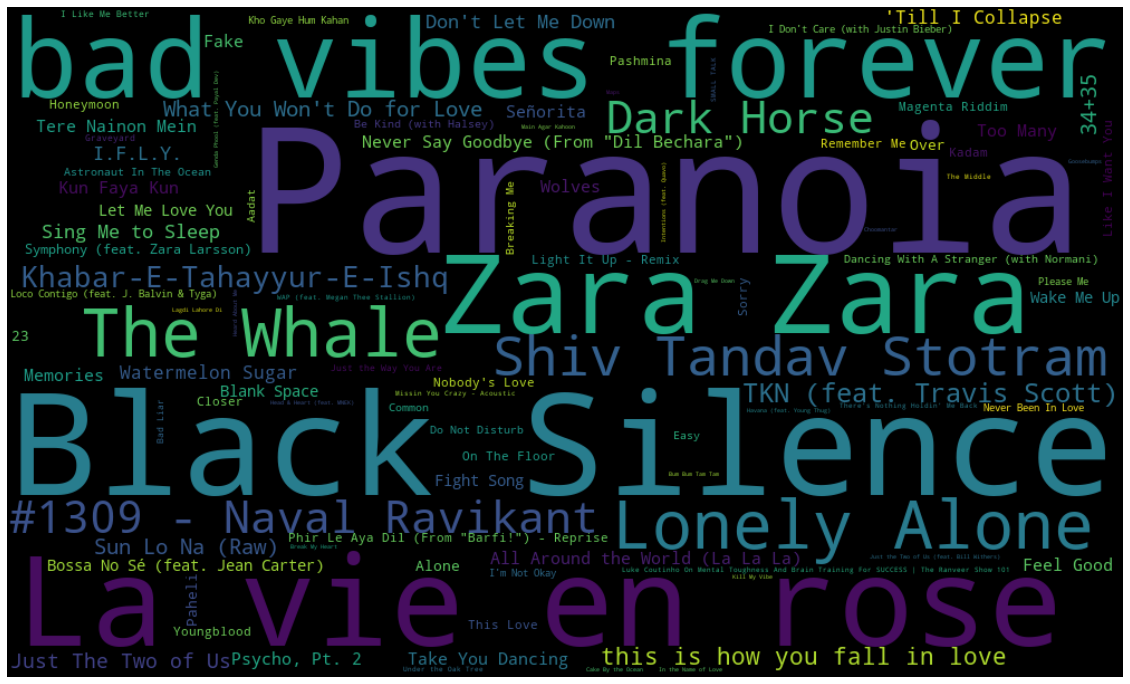

In [94]:
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_songs)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

In [111]:
#My usage based on the daily hours.
#My usage based on the daily days over week. 
#The heatmap would show at what time of what day I usually listen more songs

active_usage = df.groupby(['hour', 'day-name'])['artistName'].size().reset_index()
active_usage_pivot = active_usage.pivot("hour", 'day-name', 'artistName')
active_usage_pivot.head()

day-name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,1.0,40.0,NaN,NaN,NaN,NaN,NaN
1,NaN,11.0,NaN,NaN,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,2.0,NaN,4.0
3,11.0,NaN,3.0,NaN,14.0,5.0,NaN
4,13.0,48.0,24.0,10.0,6.0,37.0,NaN


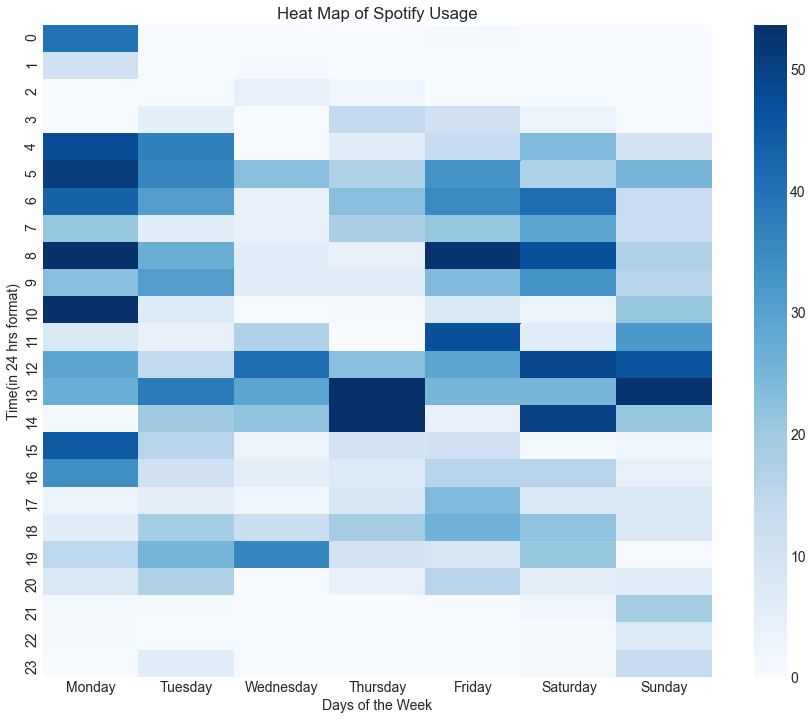

In [112]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(active_usage_pivot[days].fillna(0), robust=True, cmap="Blues", ax = ax);
ax.set(title="Heat Map of Spotify Usage", xlabel="Days of the Week",ylabel="Time(in 24 hrs format)");

In [72]:
#Who are my favourite 100 Artist ? Make a word cloud to show them.
#Here we want to make a list of my favourite 100 artist based on my daily usage. 
#Further we want to show the generated list in a word cloud for better visualisation.

fav_artist=df.groupby(["artistName"])["Count"].count()
fav_artist.sort_values(ascending=False).head(10)


artistName
Kyle Olthoff           93
Russ                   55
Maroon 5               54
XXXTENTACION           50
Postcards From Mars    44
Taylor Swift           36
Shawn Mendes           35
Naval                  34
Drake                  33
DJ Snake               33
Name: Count, dtype: int64

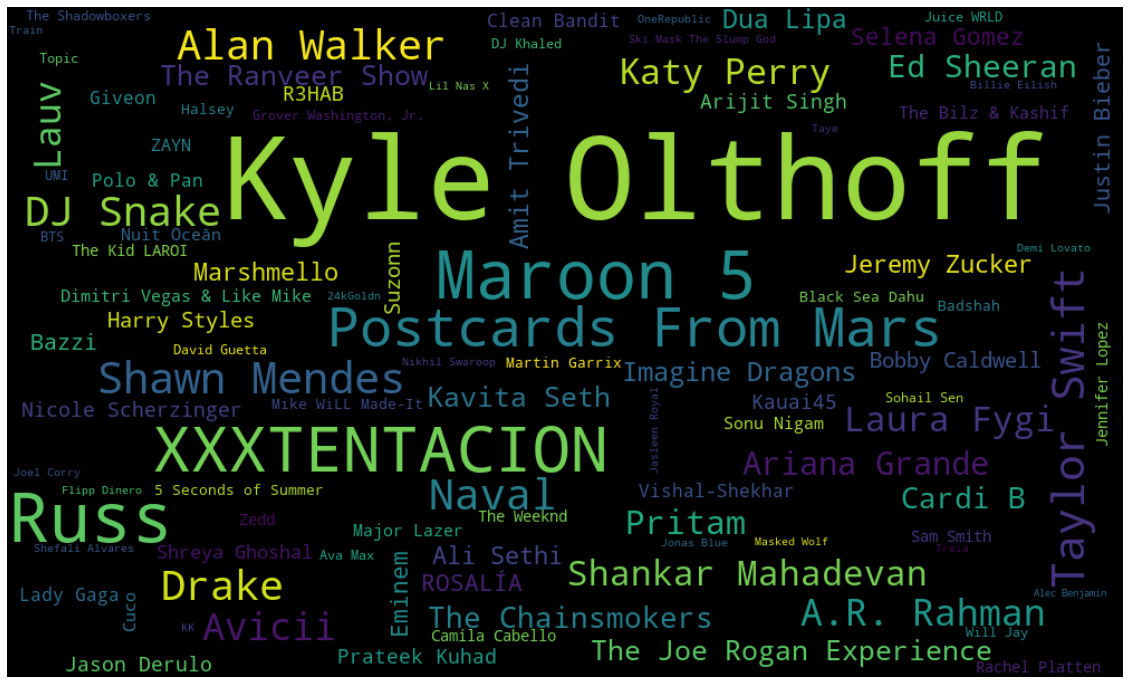

In [73]:
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_artist)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);